In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import List
from IPython.display import display

# Constants
ALL_STARS_DATASET_LOCATION = './datasets/allstar_player_talent.csv'

In [87]:
def get_head_and_tail(dataframe: pd.DataFrame, head: int, tail: int) -> pd.DataFrame:
    return pd.concat([dataframe.head(n=head), dataframe.tail(n=tail)])

In [88]:
def get_na_from_df(dataframe: pd.DataFrame) -> pd.Series:
    return dataframe.isna().sum()

In [89]:
DEFAULT_COUNT_COLUMN_NAME = 'count'

def get_distinct_values_for_column(dataframe: pd.DataFrame, column: str, count_name=DEFAULT_COUNT_COLUMN_NAME) -> pd.DataFrame:
    return dataframe.groupby(by=column).size().reset_index(name='count')

def get_all_group_by_for_each_column(dataframe: pd.DataFrame, columns: List[str]) -> List[pd.DataFrame]:
    list_of_dataframes = []
    for column in columns:
        list_of_dataframes.append(get_distinct_values_for_column(dataframe=dataframe, column=column))
    
    return list_of_dataframes

def draw_bar_chart(dataframe: pd.DataFrame, x_column: str, y_column=DEFAULT_COUNT_COLUMN_NAME) -> None:
    plt.bar(x_column, y_column, data=dataframe)
    plt.xlabel(x_column),
    plt.xticks(rotation = 90)
    plt.ylabel(y_column)
    plt.title('Cantidad de files por {}'.format(x_column))
    plt.show()

In [90]:
all_stars_df = pd.read_csv(ALL_STARS_DATASET_LOCATION, header=0)

## Resumen del dataset
### Conceptos de Baseball
- **(PA) Plate Appearance**: A un jugador se le atribuye una apariencia de placa cada vez que completa un turno de bateo.
- **(IP) Innings pitched**: Son el número de entradas que ha completado un lanzador, medido por el número de bateadores y corredores de base que se eliminan mientras el lanzador está en el montículo de lanzamiento en un juego.
- **(ASG) All Stars Game**: Partido de All Stars.
- **Carreras ofensivas**: Es una estadística de béisbol que mide la cantidad de carreras que un jugador gano o le costó a su equipo en ofensiva en relación con un jugador promedio
- **Carreras defensivas**: Es una estadística de béisbol que mide la cantidad de carreras que un jugador salvó o le costó a su equipo en defensa en relación con un jugador promedio

### Descripción de cada columna

Columnas del dataset All Players Talent
| Columna  | Descripción  |
|---|---|
| bbref_ID  | ID del jugado basado en [Baseball-Reference.com](https://www.baseball-reference.com/). |
| yearID  | La temporada  |
| gameNum  | Orden del partido dependiendo de la temporada.  |
| gameId  | ID del partido basado en [Baseball-Reference.com](https://www.baseball-reference.com/).   |
| lgID  |  ID de la liga del equipo de All Stars. |
| startingPos  | Posición en la que juego el jugador. [Convención usada.](https://en.wikipedia.org/wiki/Baseball_positions#:~:text=Each%20position%20conventionally%20has%20an,and%209%20(right%20fielder).)  |
| OFF600  | Estimación de talento ofensivo, en carreras por encima del promedio de la liga por cada 600 *PA*. [Link para más información sobre Offensive Stats](https://www.rookieroad.com/baseball/statistics/offensive-stats/). |
| DEF600  | Estimación del talento de fildeo, en carreras por encima del promedio de la liga por cada 600 *PA*. [Link para más información sobre Deffensive Stats](https://www.rookieroad.com/baseball/statistics/defensive-stats/). |
| PITCH200  | Estimación del talento de lanzamiento, en carreras por encima del promedio de la liga por 200 *IP*. [Link para más información sobre Pitcher Stats](https://www.rookieroad.com/baseball/statistics/pitcher-stats/). |
| asg_PA  | Número de PA en el partido.  |
| asg_IP  | Número de IP en el partido.  |
| OFFper9innASG | Carreras ofensivas esperadas añadidas por encima del promedio (de talento) basadas en PA en ASG, escaladas a un juego de 9 entradas  |
| DEFper9innASG | Carreras defensivas esperadas añadidas por encima del promedio (de talento) basadas en PA en ASG, escaladas a un juego de 9 entradas  |
| PITper9innASG | Carreras de lanzamiento esperadas agregadas por encima del promedio (de talento) basadas en IP en ASG, escaladas a un juego de 9 entradas  |
| TOTper9innASG | Carreras esperadas añadidas por encima del promedio (de talento) basadas en PA/IP en ASG, escaladas a un juego de 9 entradas  |

In [91]:
get_head_and_tail(all_stars_df, head=10, tail=10)

,bbref_ID,yearID,gameNum,gameID,lgID,startingPos,OFF600,DEF600,PITCH200,asg_PA,asg_IP,OFFper9innASG,DEFper9innASG,PITper9innASG,TOTper9innASG
0,goldspa01,2015,0,NLS201507140,NL,3.0,36.755724,-0.117214,0.000000,3,0.0,0.183779,-0.000586,0.000000,0.183193
1,mccutan01,2015,0,NLS201507140,NL,8.0,33.676168,-0.168658,0.000000,3,0.0,0.168381,-0.000843,0.000000,0.167538
2,harpebr03,2015,0,NLS201507140,NL,9.0,30.925454,1.382969,0.000000,3,0.0,0.154627,0.006915,0.000000,0.161542
3,greinza01,2015,0,NLS201507140,NL,1.0,0.000000,0.000000,15.645611,0,2.0,0.000000,0.000000,0.156456,0.156456
4,poseybu01,2015,0,NLS201507140,NL,2.0,21.692969,7.595546,0.000000,2,0.0,0.072310,0.025318,0.000000,0.097628
5,frazito01,2015,0,NLS201507140,NL,5.0,14.534261,4.787243,0.000000,3,0.0,0.072671,0.023936,0.000000,0.096608
6,rizzoan01,2015,0,NLS201507140,NL,0.0,22.171148,0.670665,0.000000,2,0.0,0.073904,0.002236,0.000000,0.076139
7,kershcl01,2015,0,NLS201507140,NL,NaN,0.000000,0.000000,14.695875,0,1.0,0.000000,0.000000,0.073479,0.073479
8,peraljh01,2015,0,NLS201507140,NL,6.0,7.193126,10.385048,0.000000,2,0.0,0.023977,0.034617,0.000000,0.058594
9,crawfbr01,2015,0,NLS201507140,NL,NaN,2.372143,13.079626,0.000000,2,0.0,0.007907,0.043599,0.000000,0.051506


### Cantidad de nulos por columna

In [92]:
get_na_from_df(dataframe=all_stars_df)

bbref_ID            0
yearID              0
gameNum             0
gameID              0
lgID                0
startingPos      2351
OFF600              0
DEF600              0
PITCH200            0
asg_PA              0
asg_IP              0
OFFper9innASG       0
DEFper9innASG       0
PITper9innASG       0
TOTper9innASG       0
dtype: int64

## Análisis de variables cualitativas
### Columnas con variables cualitativas

- yearID
- gameNum 
- gameID 
- lgID
- startingPos

yearID


,yearID,count
0,1933,30
1,1934,35
2,1935,31
3,1936,31
4,1937,31
...,...,...
77,2011,60
78,2012,61
79,2013,55
80,2014,62


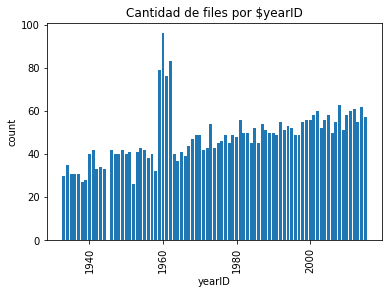

gameNum


,gameNum,count
0,0,3596
1,1,169
2,2,165


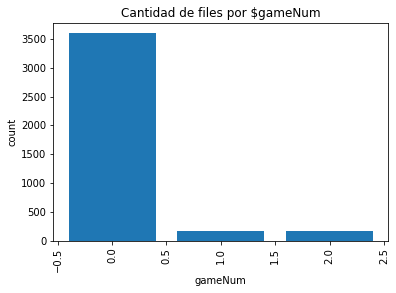

gameID


,gameID,count
0,ALS193307060,30
1,ALS193507080,31
2,ALS193707070,31
3,ALS193907110,28
4,ALS194107080,42
...,...,...
81,NLS200707100,55
82,NLS200907140,51
83,NLS201107120,60
84,NLS201307160,55


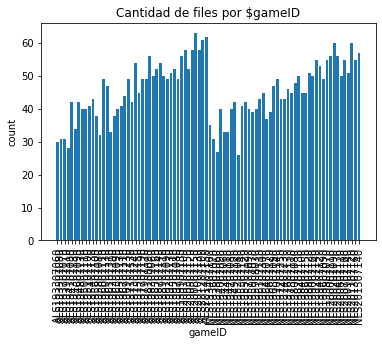

lgID


,lgID,count
0,AL,1931
1,NL,1999


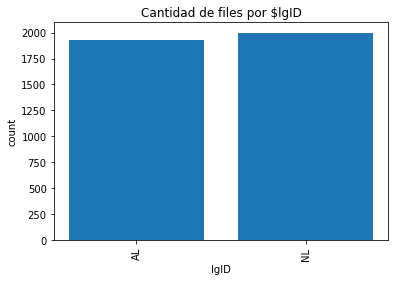

startingPos


,startingPos,count
0,0.0,10
1,1.0,172
2,2.0,172
3,3.0,172
4,4.0,172
5,5.0,172
6,6.0,171
7,7.0,172
8,8.0,172
9,9.0,172


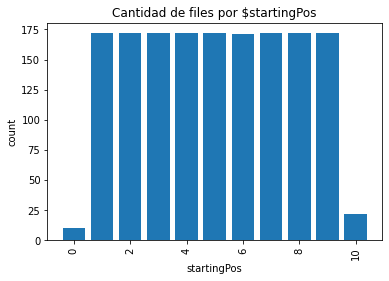

In [93]:
list_of_qualitative_columns = ['yearID', 'gameNum', 'gameID', 'lgID', 'startingPos']

group_by_dfs = get_all_group_by_for_each_column(dataframe=all_stars_df, columns=list_of_qualitative_columns)

for column, df in zip(list_of_qualitative_columns, group_by_dfs):
    print(column)
    display(df)
    draw_bar_chart(dataframe=df, x_column=column)

### ¿Es posible realizar este gráfico con un histograma?